In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

In [2]:
model = YOLO('yolov8n.pt')

In [3]:
image_path = r"C:\Users\Karthic\Downloads\bus (1).jpg"
results = model(image_path)


image 1/1 C:\Users\Karthic\Downloads\bus (1).jpg: 640x480 4 persons, 1 bus, 1 stop sign, 101.5ms
Speed: 7.8ms preprocess, 101.5ms inference, 12.0ms postprocess per image at shape (1, 3, 640, 480)


In [5]:
results[0].show()


In [9]:
print("🔹 Running YOLOv8 detection...")
start_time = time.time()
results = model.predict(source=image_path, save=True, show=False)  # save=True saves the output image
end_time = time.time()
print(f"✅ Detection complete in {end_time - start_time:.2f} seconds")


🔹 Running YOLOv8 detection...

image 1/1 C:\Users\Karthic\Downloads\bus (1).jpg: 640x480 4 persons, 1 bus, 1 stop sign, 78.1ms
Speed: 3.2ms preprocess, 78.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to C:\Users\Karthic\runs\detect\predict
✅ Detection complete in 0.11 seconds


In [10]:
annotated_frame = results[0].plot()  # get image with boxes
cv2.imshow("YOLOv8 Object Detection", annotated_frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
boxes = results[0].boxes
confidences = boxes.conf.cpu().numpy()
labels = [model.names[int(cls)] for cls in boxes.cls.cpu().numpy()]

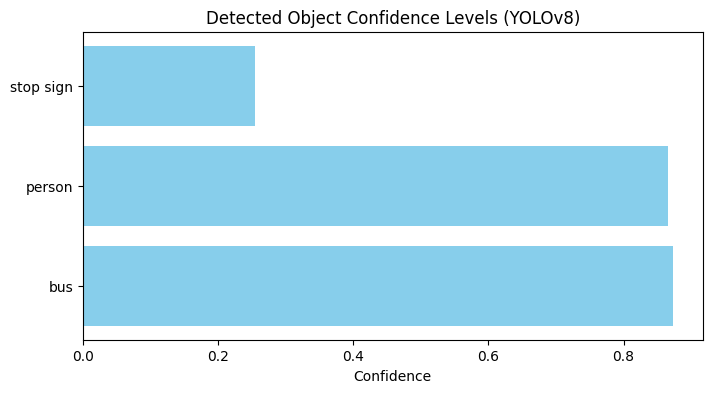

In [12]:
plt.figure(figsize=(8, 4))
plt.barh(labels, confidences, color='skyblue')
plt.xlabel('Confidence')
plt.title('Detected Object Confidence Levels (YOLOv8)')
plt.show()


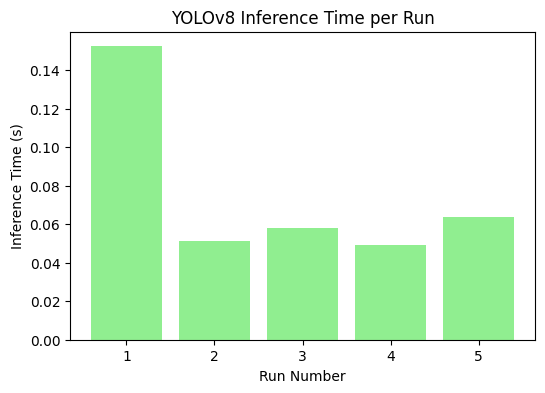

In [13]:
times = []
for i in range(5):
    t1 = time.time()
    _ = model.predict(source=image_path, verbose=False)
    t2 = time.time()
    times.append(t2 - t1)

plt.figure(figsize=(6, 4))
plt.bar(range(1, 6), times, color='lightgreen')
plt.xlabel("Run Number")
plt.ylabel("Inference Time (s)")
plt.title("YOLOv8 Inference Time per Run")
plt.show()